In [1]:
import pyspark
from pyspark.sql import SparkSession
from graphframes import GraphFrame

import networkx as nx
from matplotlib import pyplot as plt
from igraph import Graph, plot

# Example of PySpark and GraphFrame

## Create graph

In [2]:
spark = SparkSession.builder.appName("build_example_graph").getOrCreate()

In [3]:
vertices = spark.createDataFrame(
    [
        ("1", "Carter", "Derrick", 50),
        ("2", "May", "Derrick", 26),
        ("3", "Mills", "Jeff", 80),
        ("4", "Hood", "Robert", 65),
        ("5", "Banks", "Mike", 93),
        ("98", "Berg", "Tim", 28),
        ("99", "Page", "Allan", 16),
    ],
    ["id", "name", "firstname", "age"],
)
edges = spark.createDataFrame(
    [
        ("1", "2", "friend"),
        ("2", "1", "friend"),
        ("3", "1", "friend"),
        ("1", "3", "friend"),
        ("2", "3", "follows"),
        ("3", "4", "friend"),
        ("4", "3", "friend"),
        ("5", "3", "friend"),
        ("3", "5", "friend"),
        ("4", "5", "follows"),
        ("98", "99", "friend"),
        ("99", "98", "friend"),
    ],
    ["src", "dst", "type"],
)

In [4]:
g = GraphFrame(vertices, edges)

In [5]:
# Take a look at the DataFrames
g.vertices.show()

+---+------+---------+---+
| id|  name|firstname|age|
+---+------+---------+---+
|  1|Carter|  Derrick| 50|
|  2|   May|  Derrick| 26|
|  3| Mills|     Jeff| 80|
|  4|  Hood|   Robert| 65|
|  5| Banks|     Mike| 93|
| 98|  Berg|      Tim| 28|
| 99|  Page|    Allan| 16|
+---+------+---------+---+



In [6]:
g.edges.show()

+---+---+-------+
|src|dst|   type|
+---+---+-------+
|  1|  2| friend|
|  2|  1| friend|
|  3|  1| friend|
|  1|  3| friend|
|  2|  3|follows|
|  3|  4| friend|
|  4|  3| friend|
|  5|  3| friend|
|  3|  5| friend|
|  4|  5|follows|
| 98| 99| friend|
| 99| 98| friend|
+---+---+-------+



In [7]:
# Check the number of edges of each vertex
g.degrees.show()

+---+------+
| id|degree|
+---+------+
|  3|     7|
| 98|     2|
| 99|     2|
|  5|     3|
|  1|     4|
|  4|     3|
|  2|     3|
+---+------+



## Visualize graph

In [8]:
# Using networkx
def PlotGraph(edge_list):
    Gplot = nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst'])

    plt.subplot(121)
    nx.draw(Gplot)

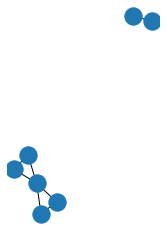

In [9]:
PlotGraph(g.edges)

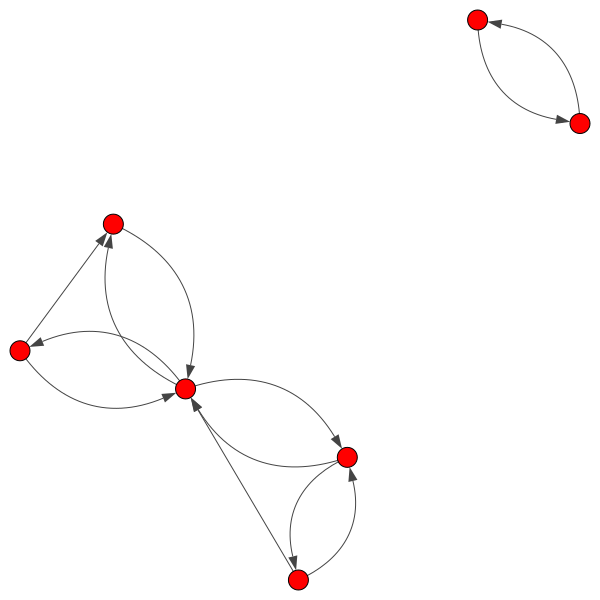

In [10]:
# Using igraph
ig = Graph.TupleList(g.edges.collect(), directed=True)
plot(ig)